### 성능평가

- 평가 항목 방식 케이스
    - 지도학습의 분류
        - 혼동행렬(정확도,f1-score,정밀도,재현율), AUC, ROC
    - 지도학습의 회귀
        - 손실
    - 비지도 학습
    
    - 강화학습

### 머신러닝 > 지도학습 > 분류 > 성능평가지표

- 통계학의 혼동행렬이라는 항목을 이용하여 평가
- 개요
    - 예측값이 실제 관측값을 얼마나 정확하게 예측하였는가?
    - 이 사항을 보여주는 행렬
    - 예
        - 암을 스스로 예측 하였는데, 실제 양성인지 악성인지 예측하는 예
        - 실제는 병이 있었는데 없다고 예측, 있다고 예측
        - 실제는 병이 없었는데 없다고 예측, 없다고 예측
        
|구분|예측:True|예측:False|
|:--:|:--:|:--:|
|실제:예(Positive)|TP|FN|
|실제:아니오(Negative)|FP|TN|

- TP : 참긍정
    - 병이 있다고 예측을 했고, 실제로 병이 있다.
    - 긍정한 것이 참이 되었다.
    
- TN : 참부정
    - 병이 없다고 예측을 했고, 실제로 병이 없다. 
    - 부정한 것이 참이 되었다
    
    
- FP : 거짓긍정(긍정오류)
    - 병이 있다고 예측을 했고, 실제로 병이 없다.
    - 긍정한 것이 거짓이 되었다
    - 1형 오류
    
- FN : 거짓부정(부정오류)
    - 병이 없다고 예측을 했고, 실제로 병이 있다.
    - 부정한 것이 거짓이 되었다.
    - 2형 오류

- 정밀도 (P Precision)
    - 병이 있다고 예측을 했는데, 실제로 병이 있는 비율, 정답율
    - TP / (TP + FP)
- 재현율 (R Racall)
    - 실제로 병이 있는 전체 데이터 중에서 참긍정 비율
    - TP / (TP + FN)
- F1 점수
    - 정밀도와 재현율의 조화평균(Harmonic mean)
    - F1 = 2 / ( 1/P + 1/R)
- 특이성
    - 실제 병이 없는 전체 사람들 중에 예측이 참부정
    - TN / (TN + FP)
    
- 곡선하 면적
    - 참 긍정률과 거짓 부정률 사이의 관계 표현
    - (1 - 특이성)
    - AUC : ROC의 상세값 

#### 실제 데이터를 이용하여 성능평가를 수행

- 데이터 : 아이리스 활용


In [86]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [87]:
ds = load_iris()
ds.data[:1], ds.feature_names, ds.target

(array([[5.1, 3.5, 1.4, 0.2]]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [88]:
ds.target.shape, ds.target_names.shape,type(ds.target_names)

((150,), (3,), numpy.ndarray)

In [89]:
ds.target_names[0],ds.target_names[1],ds.target_names[2]

('setosa', 'versicolor', 'virginica')

In [90]:
ds.target_names[ds.target][:2]

array(['setosa', 'setosa'], dtype='<U10')

In [91]:
# 아이리스 데이터 로드
def attach_iris():
    ds = load_iris()
    df = pd.DataFrame(ds.data, columns=ds.feature_names)
    # species라는 컬럼을 추가한다 => 값은 setosa, versicolor, virginica 중 하나로 설정
    df['species'] = ds.target_names[ds.target]    
    return df # dataframe
df = attach_iris()

### 분류 알고리즘을 다양하게 사용하여 교차 성능평가 수행
- 하이퍼파라미터 튜닝 + 파이프라인 ?
- 각각 알고리즘 별로 적용하여 시각화 및 수치 비교?

In [92]:
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [93]:
# 알고리즘
# 향후 알고리즘에 대한 이해와 데이터에 대한 적합성에 대한 식견이 좀 더 보완된다면

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# 나이즈베이즈 분류모형(GaussianNB)에서는 모든 차원의 개별 독립변수가 서로 조건부독립(conditional independent)이라는 가정

In [94]:
# 알고리즘의 시각화를 위해 사전 설정
# 선형 그래프의 모양을 지정
# 파라미터 값을 임의로 부여
class_map = {
    'LogisticRegression':('-', LogisticRegression()),
    'DecisionTreeClassifier':('--',DecisionTreeClassifier(max_depth=5)),
    'RandomForestClassifier':('.-',RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1)),
    'GaussianNB':(':',GaussianNB())
}

In [95]:
for n in class_map :
    print(n)

LogisticRegression
DecisionTreeClassifier
RandomForestClassifier
GaussianNB


In [96]:
for key,value in class_map.items() :
    print(key,value)

LogisticRegression ('-', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False))
DecisionTreeClassifier ('--', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'))
RandomForestClassifier ('.-', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=1, max_leaf_nodes=None,
                       min_impurity_d

In [97]:
# 데이터 정리
X = df[ df.columns[:4] ]
X.shape

(150, 4)

In [98]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [99]:
# 특정 종에 대해서 정답을 구축
Y = df['species'] == 'versicolor'
type(Y), Y[:2]

(pandas.core.series.Series, 0    False
 1    False
 Name: species, dtype: bool)

In [100]:
# 훈련용, 테스트용 데이터 분류
# 데이터가 작아서 결과물의 변별력을 높이고자 임의로 test_size 는 80%로 높였다
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.8)

In [101]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((30, 4), (120, 4), (30,), (120,))

 LogisticRegression : 0.6546854942233633 
 DecisionTreeClassifier : 0.9492939666238767 
 RandomForestClassifier : 0.9801026957637997 
 GaussianNB : 0.9743260590500642 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


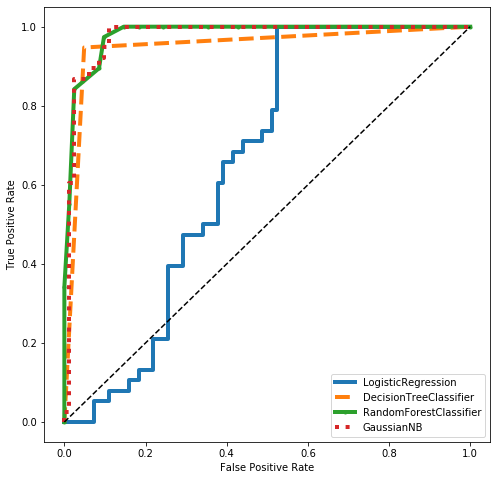

In [103]:
class_map = {
    'LogisticRegression':('-', LogisticRegression()),
    'DecisionTreeClassifier':('--',DecisionTreeClassifier(max_depth=5)),
    'RandomForestClassifier':('.-',RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1)),
    'GaussianNB':(':',GaussianNB())
}

# 시각화를 통해서 확인 (ROC, AUC)
plt.figure(figsize=(8,8))

# 반복하여 시각화 처리
for name , (linestyle, model) in class_map.items() :
    # 학습
    model.fit(X_train, Y_train)
    # 예측
    # 예측에 대한 확률로 예측
    # 0,1  중에 1이 될 확률이 0.57이다 => 1을 더 많이 예측하는 모델
    preds = model.predict_proba(X_test)
    # print(preds.shape)
    #=> preds => Series 타입으로 설정 roc 커브의 함수형식을 맞추기 위해서 예측답 추출
    preds = pd.Series( preds[:,1] )
    # ROC 값 획득
    # roc_curve 의 리턴값
    # fpr : 거짓 양성비 (긍정오류율) 
    # tpr : 참 양성비
    # _ : 임계값, tpr과 fpr을 계산할때 (내부에서) 사용한 결정함수의 임계값 : 이해
    fpr , tpr , _ = roc_curve( Y_test, preds )
    # ROC 드로잉
    
    # AUC 표시 -> 수치!
    auc_score = auc(fpr,tpr)
    print(' %s : %s ' % (name,auc_score))
    # 선 그리기
    plt.plot( fpr, tpr, linestyle, linewidth=4, label=name )
    pass

# 시각화 마무리
plt.legend()  # 범례표시
plt.plot( [0,1],[0,1],'k--' )  # 대각선 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()  # 그래프 표시